In [29]:
import matplotlib.pyplot as plt
from selenium import webdriver
from time import sleep
import bs4

url = 'https://www.worldometers.info/coronavirus/'
search_term = 'Italy'

browser = webdriver.Firefox()
browser.get(url)
browser.implicitly_wait(3)

search_field = browser.find_element_by_xpath("//input[@type='search']")
search_field.send_keys(search_term)

# Contry - Total Cases - New Cases - Total Death - New Deaths - Total Recovered - Active Cases - Serious Cases - Tot Cases
data = []
soup = bs4.BeautifulSoup(browser.page_source, 'html.parser')
tr = soup.find('tr', {'class' : 'odd'})
for td in tr.find_all('td')[1:]:
    data.append(int(td.get_text().strip().replace(',', '').replace('.', '') if td.get_text().strip() != '' else '0'))

print(data)

[15113, 0, 1016, 0, 1258, 12839, 1153, 2500]


<BarContainer object of 3 artists>

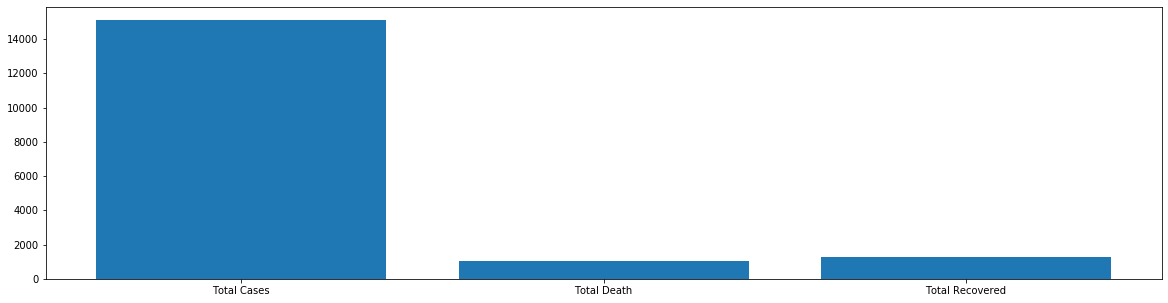

In [30]:
plt.figure(figsize=(20,5))
x_bar = ['Total Cases', 'Total Death', 'Total Recovered']
y_bar = [data[0], data[2], data[4]]

plt.bar(x_bar, y_bar)